In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

In [53]:
boston = datasets.load_boston()
targets = boston.target
features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [54]:
features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
features.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [56]:
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [57]:
scaler=StandardScaler()
norfeatures=scaler.fit_transform(features)


(array([[  0., 385., 105.,   9.,   4.,   1.,   2.],
        [  0., 372.,  95.,  39.,   0.,   0.,   0.],
        [  0., 294., 200.,  12.,   0.,   0.,   0.],
        [  0., 471.,   0.,  35.,   0.,   0.,   0.],
        [  0., 297., 193.,  16.,   0.,   0.,   0.],
        [ 12., 278., 194.,  22.,   0.,   0.,   0.],
        [ 16., 203., 287.,   0.,   0.,   0.,   0.],
        [  0., 305., 181.,  20.,   0.,   0.,   0.],
        [  0., 374., 132.,   0.,   0.,   0.,   0.],
        [  0., 340., 166.,   0.,   0.,   0.,   0.],
        [ 16., 202., 288.,   0.,   0.,   0.,   0.],
        [ 39.,  59., 408.,   0.,   0.,   0.,   0.],
        [  0., 292., 189.,  25.,   0.,   0.,   0.]]),
 array([-3.9071933 , -1.92988989,  0.04741353,  2.02471694,  4.00202036,
         5.97932377,  7.95662719,  9.9339306 ]),
 <a list of 13 BarContainer objects>)

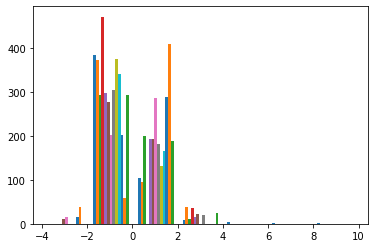

In [58]:
plt.hist(norfeatures,bins=7)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(norfeatures, targets, test_size=0.33, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=20) 


In [70]:
grid_param = {
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}




In [71]:
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [72]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [73]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [83]:
modelregressor = RandomForestRegressor(random_state=20,criterion='mse', max_depth=14, min_samples_leaf=1, min_samples_split=2)

In [84]:
scor=modelregressor.fit(X_train,y_train)

In [85]:
scor.score(X_train,y_train)

0.9758553154487049

In [86]:
scor.score(X_test,y_test)

0.8659769945478313